In [11]:
import json
import pandas as pd
import numpy as np
import ast
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA

In [11]:
nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

'''
Explicación:
La función nltk.download('punkt') descarga e instala el recurso "punkt" en tu sistema.
Este recurso contiene modelos para la segmentación de frases en diferentes idiomas.
Una vez descargado, el código de preprocesamiento podrá encontrar el recurso y tokenizar las reseñas correctamente.

La función nltk.download('stopwords') descarga e instala el recurso "stopwords" en tu sistema.
Este recurso contiene listas de palabras comunes en diferentes idiomas, que suelen ser poco informativas y se suelen filtrar en el preprocesamiento de texto.
Una vez descargado, el código de preprocesamiento podrá acceder a la lista de stopwords en inglés y realizar la limpieza correctamente.

la función WordNetLemmatizer(), que depende del recurso "wordnet" de NLTK.
Este recurso contiene la base de datos WordNet, que es necesaria para realizar la lematización de palabras en inglés.

nltk.download('omw-1.4') Este comando descargará el recurso necesario para el lematizador de WordNet.
'''

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]    | 

'\nExplicación:\nLa función nltk.download(\'punkt\') descarga e instala el recurso "punkt" en tu sistema.\nEste recurso contiene modelos para la segmentación de frases en diferentes idiomas.\nUna vez descargado, el código de preprocesamiento podrá encontrar el recurso y tokenizar las reseñas correctamente.\n\nLa función nltk.download(\'stopwords\') descarga e instala el recurso "stopwords" en tu sistema.\nEste recurso contiene listas de palabras comunes en diferentes idiomas, que suelen ser poco informativas y se suelen filtrar en el preprocesamiento de texto.\nUna vez descargado, el código de preprocesamiento podrá acceder a la lista de stopwords en inglés y realizar la limpieza correctamente.\n\nla función WordNetLemmatizer(), que depende del recurso "wordnet" de NLTK.\nEste recurso contiene la base de datos WordNet, que es necesaria para realizar la lematización de palabras en inglés.\n'

In [12]:
ruta_json = "C:\\Users\\johan\\Bootcamp_SoyHenry\\PI_MlopsSteam\\PI_01\\australian_user_reviews.json"

In [13]:
# Carga de datos
filas = []
with open(ruta_json, encoding="MacRoman") as archivo:
    for linea in archivo.readlines():
        datos_usuario = ast.literal_eval(linea)
        reseñas = datos_usuario['reviews']
        for review in reseñas:
            filas.append({'reseña': review['review']}) #, 'sentimiento': review['recommend']

data = pd.DataFrame(filas)



In [14]:
#1. Preprocesamiento de datos:
'''
Limpiar las reseñas: eliminar stopwords, puntuación y caracteres especiales.
Convertir las reseñas a minúsculas.
Lemmatizar las palabras para obtener la raíz.
'''
# Limpiar y lematizar las reseñas
data['reseña_limpia'] = data['reseña'].apply(lambda x: ' '.join([WordNetLemmatizer().lemmatize(word.lower()) for word in word_tokenize(x) if word not in stopwords.words('english') and word.isalnum()]))

# Ejemplo de una reseña preprocesada
data['reseña_limpia'].iloc[0]

'''
En resumen, esta instrucción toma cada reseña, la divide en palabras (tokeniza), lematiza cada palabra, 
filtra las stopwords y caracteres no alfanuméricos, y luego une las palabras procesadas en una nueva cadena de texto, 
que se almacena en la columna 'reseña_limpia'. La columna 'reseña_limpia' contendrá versiones lematizadas y limpias de las reseñas originales.
'''


"\nEn resumen, esta instrucción toma cada reseña, la divide en palabras (tokeniza), lematiza cada palabra, \nfiltra las stopwords y caracteres no alfanuméricos, y luego une las palabras procesadas en una nueva cadena de texto, \nque se almacena en la columna 'reseña_limpia'. La columna 'reseña_limpia' contendrá versiones lematizadas y limpias de las reseñas originales.\n"

In [15]:
data

,reseña,reseña_limpia
0,Simple yet with great replayability. In my opi...,simple yet great replayability in opinion zomb...
1,It's unique and worth a playthrough.,it unique worth playthrough
2,Great atmosphere. The gunplay can be a bit chu...,great atmosphere the gunplay bit chunky time e...
3,I know what you think when you see this title ...,i know think see title barbie dreamhouse party...
4,For a simple (it's actually not all that simpl...,for simple actually simple truck driving simul...
...,...,...
59300,a must have classic from steam definitely wort...,must classic steam definitely worth buying
59301,this game is a perfect remake of the original ...,game perfect remake original half life persona...
59302,had so much fun plaing this and collecting res...,much fun plaing collecting resource xd first t...
59303,:D,d


In [16]:
X = data['reseña_limpia']

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

In [17]:
'''
Estas dos líneas de código están creando y entrenando un modelo LDA con el objetivo de descubrir 10 tópicos latentes 
en un conjunto de documentos representados mediante TF-IDF.
''' 
lda = LatentDirichletAllocation(n_components=10)
lda.fit(X_tfidf)

LatentDirichletAllocation()

In [20]:
temas = lda.components_
palabras_clave = vectorizer.get_feature_names_out()

for i, tema in enumerate(temas):
    print(f'Tema {i + 1}:')
    
    # Obtén los índices de las palabras con los pesos más altos
    palabras_indices = tema.argsort()[:-11:-1]
    
    # Imprime las palabras y sus pesos correspondientes
    for indice in palabras_indices:
        palabra = palabras_clave[indice]
        peso = tema[indice]
        print(f'\tPalabra: {palabra}, Peso: {peso:.2f}')


Tema 1:
	Palabra: love, Peso: 394.11
	Palabra: game, Peso: 276.76
	Palabra: ok, Peso: 143.76
	Palabra: lol, Peso: 137.59
	Palabra: cant, Peso: 113.29
	Palabra: wow, Peso: 86.27
	Palabra: play, Peso: 84.19
	Palabra: dota, Peso: 77.67
	Palabra: it, Peso: 76.20
	Palabra: word, Peso: 74.02
Tema 2:
	Palabra: good, Peso: 1405.32
	Palabra: game, Peso: 1035.16
	Palabra: fun, Peso: 997.85
	Palabra: play, Peso: 380.85
	Palabra: really, Peso: 339.13
	Palabra: great, Peso: 283.15
	Palabra: very, Peso: 270.44
	Palabra: friend, Peso: 257.65
	Palabra: it, Peso: 215.62
	Palabra: pretty, Peso: 208.57
Tema 3:
	Palabra: game, Peso: 784.68
	Palabra: get, Peso: 357.24
	Palabra: play, Peso: 292.92
	Palabra: like, Peso: 253.87
	Palabra: good, Peso: 234.23
	Palabra: would, Peso: 229.61
	Palabra: fun, Peso: 220.96
	Palabra: time, Peso: 205.10
	Palabra: people, Peso: 187.01
	Palabra: great, Peso: 186.52
Tema 4:
	Palabra: juego, Peso: 182.10
	Palabra: de, Peso: 174.41
	Palabra: que, Peso: 148.79
	Palabra: el, Pe

In [ ]:
#dio error con PCA
#pca = PCA(n_components=2)
#X_pca = pca.fit_transform(X_tfidf)

In [21]:
from sklearn.decomposition import TruncatedSVD

# Número de componentes deseadas
n_components = 2

# Aplicar TruncatedSVD
svd = TruncatedSVD(n_components=n_components)
X_svd = svd.fit_transform(X_tfidf)

# X_svd ahora contiene las representaciones de las reseñas en el espacio reducido


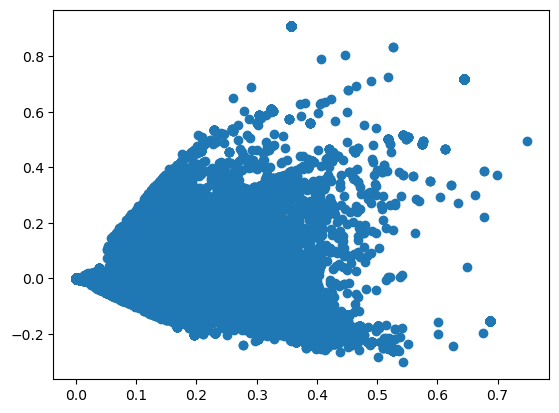

In [22]:
import matplotlib.pyplot as plt

plt.scatter(X_svd[:, 0], X_svd[:, 1])
plt.show()

In [23]:
import shap

# Obtén las probabilidades de los temas para cada reseña
temas_probabilidades = lda.transform(X_tfidf)

# Configura el explainer SHAP
explainer = shap.Explainer(lda)

# Calcula los valores SHAP para las primeras 100 reseñas (puedes ajustar este número según tu dataset)
shap_values = explainer.shap_values(X_tfidf[:100])

# Plotea los valores SHAP
shap.summary_plot(shap_values, X_tfidf[:100], feature_names=vectorizer.get_feature_names_out())


ModuleNotFoundError: No module named 'shap'